In [39]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 300)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [ ]:

#Importing YouTube comments data
data = pd.read_csv('amazon_alexa.tsv', delimiter='\t')

In [ ]:
from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [ ]:
#Testing NLP - Sentiment Analysis using TextBlob
TextBlob("The movie is good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [66]:
from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')



In [ ]:
#Displaying the first 5 rows of the data
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
#Finding the size of the data
data.shape

(3150, 5)

In [ ]:

comm = data
comm.shape


(3150, 5)

In [ ]:
#Calculating the Sentiment Polarity
polarity=[] # list which will contain the polarity of the comments
subjectivity=[] # list which will contain the subjectivity of the comments
for i in comm['verified_reviews'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [ ]:
#Adding the Sentiment Polarity column to the data
comm['polarity']=polarity
comm['subjectivity']=subjectivity


In [ ]:
comm[comm.polarity<0].head(10)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,-0.100000,0.51250
14,5,30-Jul-18,Oak Finish,Just what I expected....,1,-0.100000,0.40000
29,5,30-Jul-18,Charcoal Fabric,Just like the other one,1,-0.125000,0.37500
109,4,30-Jul-18,Sandstone Fabric,The outlet does not work with it. Was disappointed in that.,1,-0.750000,0.75000
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,-0.100000,0.20000
145,3,30-Jul-18,Sandstone Fabric,it's annoying that everything they show Alexa as being able to do has to be downloaded. You spend so much time trying to figure out how to phrase it for the machine that you may as well just look it up yourself,1,-0.033333,0.57500
164,4,30-Jul-18,Charcoal Fabric,"It performs pretty much as expected, but I am very disappointed it will not provide me with the terminology I need to play various kinds of music without subscribing to the Amazon music service. I understand my music choices may be limited, but without knowing HOW TO ASK, I cannot access the mu...",1,-0.082738,0.63631
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,-0.650000,0.95000
262,5,29-Jul-18,Sandstone Fabric,Arrived as expected.,1,-0.100000,0.40000
299,2,29-Jul-18,Charcoal Fabric,Too difficult to set up. It keeps timing out before you can enter the password,0,-0.500000,1.00000


In [ ]:
#Displaying the POSITIVE comments
comm[comm.polarity>0].head(10)


,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.625000,0.600000
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.875000,0.800000
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,0.350000,0.450000
5,5,31-Jul-18,Heather Gray Fabric,"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.",1,0.294643,0.508929
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use. It IS a great alarm. If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to he...",1,0.216667,0.458333
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'm working on getting one in every room of my house. I really like what features they offer specifily playing music on all Echos and controlling the lights throughout my house.,1,0.200000,0.200000
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,0.800000,0.750000
9,5,30-Jul-18,Heather Gray Fabric,"Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, information! It’s great!",1,0.988281,0.675000
10,5,30-Jul-18,Charcoal Fabric,"I sent it to my 85 year old Dad, and he talks to it constantly.",1,0.050000,0.266667
11,5,30-Jul-18,Charcoal Fabric,I love it! Learning knew things with it eveyday! Still figuring out how everything works but so far it's been easy to use and understand. She does make me laugh at times,1,0.403646,0.633333


In [ ]:

#Displaying the NEGATIVE comments
comm[comm.polarity<0].head(10)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,-0.100000,0.51250
14,5,30-Jul-18,Oak Finish,Just what I expected....,1,-0.100000,0.40000
29,5,30-Jul-18,Charcoal Fabric,Just like the other one,1,-0.125000,0.37500
109,4,30-Jul-18,Sandstone Fabric,The outlet does not work with it. Was disappointed in that.,1,-0.750000,0.75000
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,-0.100000,0.20000
145,3,30-Jul-18,Sandstone Fabric,it's annoying that everything they show Alexa as being able to do has to be downloaded. You spend so much time trying to figure out how to phrase it for the machine that you may as well just look it up yourself,1,-0.033333,0.57500
164,4,30-Jul-18,Charcoal Fabric,"It performs pretty much as expected, but I am very disappointed it will not provide me with the terminology I need to play various kinds of music without subscribing to the Amazon music service. I understand my music choices may be limited, but without knowing HOW TO ASK, I cannot access the mu...",1,-0.082738,0.63631
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,-0.650000,0.95000
262,5,29-Jul-18,Sandstone Fabric,Arrived as expected.,1,-0.100000,0.40000
299,2,29-Jul-18,Charcoal Fabric,Too difficult to set up. It keeps timing out before you can enter the password,0,-0.500000,1.00000


In [ ]:
#Displaying the NEUTRAL comments
comm[comm.polarity==0].head(10)


,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.0,0.0000
31,4,30-Jul-18,Charcoal Fabric,I like it,1,0.0,0.0000
49,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific list of music you must have an Amazon of Spotify “plus/prime/etc” account. So you must pay to play “your” music. 3 stars for that reason. Everything else is 👍🏻 .,1,0.0,0.3625
50,5,30-Jul-18,Charcoal Fabric,"Excelente, lo unico es que no esta en español.",1,0.0,0.0000
60,5,30-Jul-18,Heather Gray Fabric,😍,1,0.0,0.0000
62,4,30-Jul-18,Heather Gray Fabric,"Did t really know what I could use this device for. Used it for a few things, but need an overview",1,0.0,0.1500
67,5,30-Jul-18,Charcoal Fabric,You’re all I need...na na nana!,1,0.0,0.0000
73,4,30-Jul-18,Sandstone Fabric,Setting up,1,0.0,0.0000
74,5,30-Jul-18,Heather Gray Fabric,She doesn’t always listen,1,0.0,0.0000
78,5,30-Jul-18,Charcoal Fabric,I LIKE IT ALL,1,0.0,0.0000


In [ ]:
#Displaying highly subjective reviews
comm[comm.subjectivity>0.8].head(10)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
16,5,30-Jul-18,Heather Gray Fabric,Really happy with this purchase. Great speaker and easy to set up.,1,0.677778,0.861111
25,5,30-Jul-18,Sandstone Fabric,Amazing product,1,0.600000,0.900000
30,5,30-Jul-18,Sandstone Fabric,Still learning all the capabilities...but so far pretty pretty pretty good,1,0.310000,0.920000
34,5,30-Jul-18,Charcoal Fabric,This device is awesome!,1,1.000000,1.000000
45,5,30-Jul-18,Walnut Finish,Very satisfied with the Echo. Alexa now controls the lights in my family room and my wife can listen to Jimmy Buffet by just asking Alexa.,1,0.650000,1.000000
56,5,30-Jul-18,Charcoal Fabric,Works as advertised. Very easy to setup. Still learning what this can do.,1,0.563333,1.000000
65,5,30-Jul-18,Charcoal Fabric,How easy if was to set up.,1,0.433333,0.833333
75,5,30-Jul-18,Charcoal Fabric,It’s awesome,1,1.000000,1.000000
82,5,30-Jul-18,Charcoal Fabric,Great technology!! Can't believe the speaker volume and quality is so wonderful. Wish I had bought another one!,1,1.000000,0.875000
95,5,30-Jul-18,Charcoal Fabric,"We like it all so far, but have a lot to try out yet.",1,0.100000,1.000000


In [ ]:

#Displaying highly positive reviews
comm[comm.polarity>0.75].head(10)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.875000,0.800
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,0.800000,0.750
9,5,30-Jul-18,Heather Gray Fabric,"Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, information! It’s great!",1,0.988281,0.675
27,5,30-Jul-18,Charcoal Fabric,Sounds great!! Love them!,1,0.812500,0.675
34,5,30-Jul-18,Charcoal Fabric,This device is awesome!,1,1.000000,1.000
44,5,30-Jul-18,Sandstone Fabric,Great,1,0.800000,0.750
71,5,30-Jul-18,Charcoal Fabric,Works and sounds great.,1,0.800000,0.750
75,5,30-Jul-18,Charcoal Fabric,It’s awesome,1,1.000000,1.000
77,5,30-Jul-18,Heather Gray Fabric,The speaker has excellent sound and works perfectly!,1,0.800000,0.800
82,5,30-Jul-18,Charcoal Fabric,Great technology!! Can't believe the speaker volume and quality is so wonderful. Wish I had bought another one!,1,1.000000,0.875


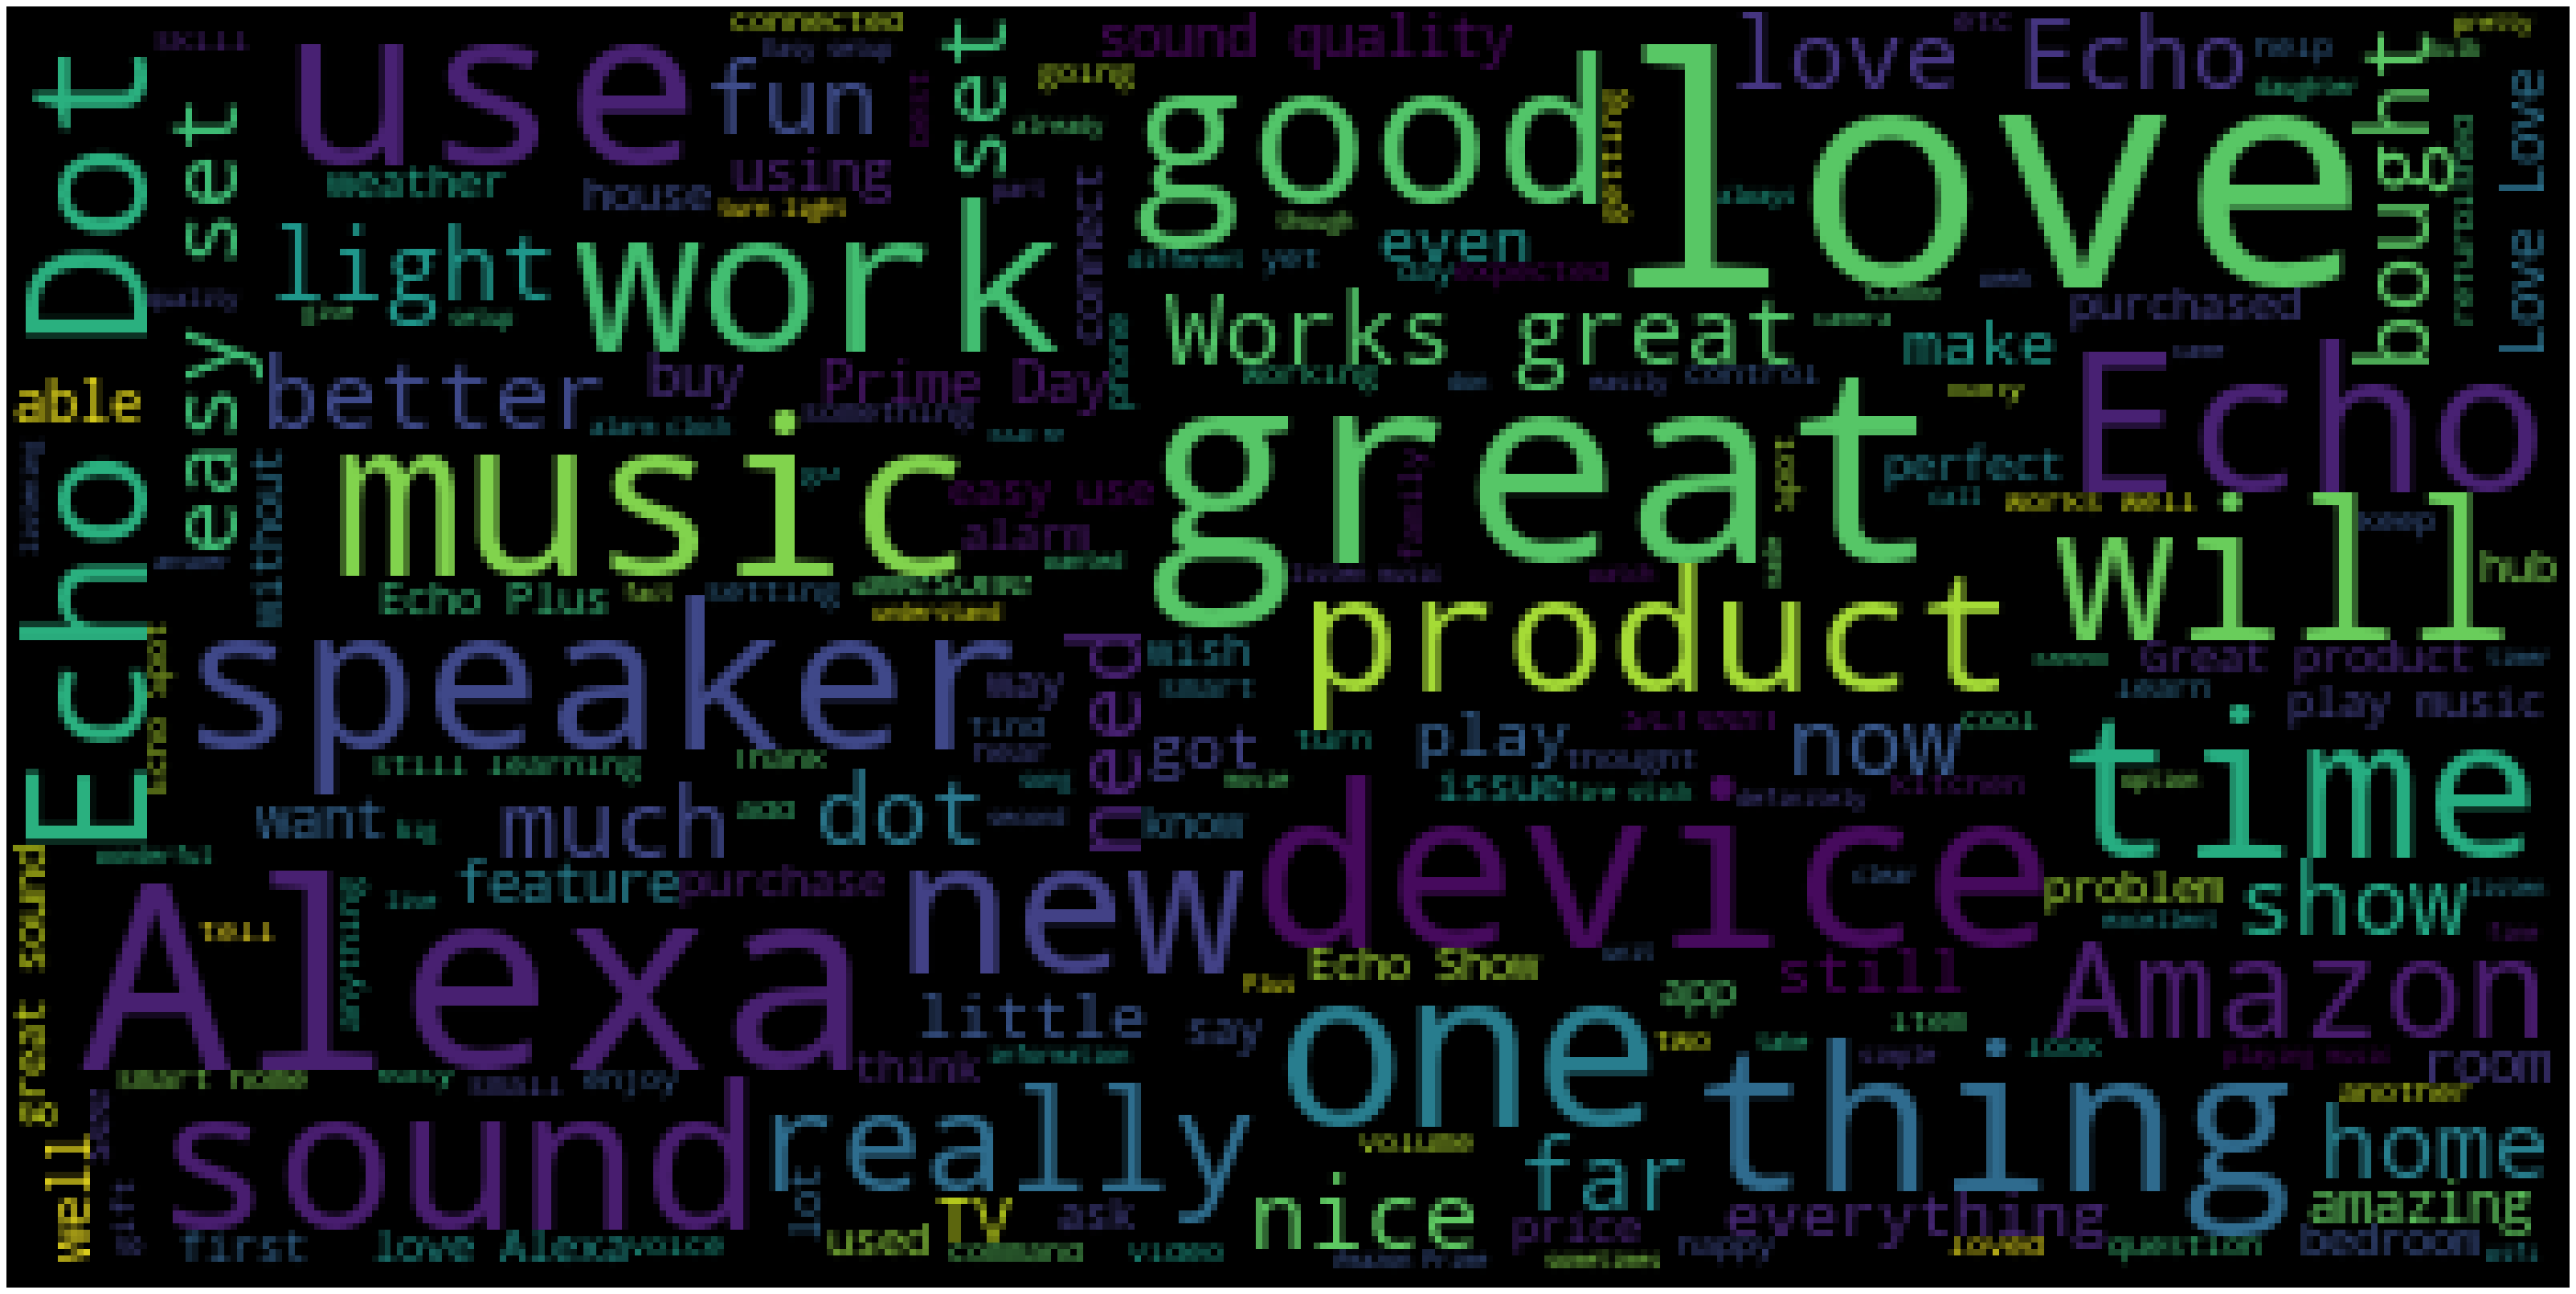

In [67]:

wc(comm['verified_reviews'][comm.polarity>0.75],'black','Common Words' )

In [47]:

#Displaying highly negative reviews
comm[comm.polarity<-0.25].head(10)

,rating,date,variation,verified_reviews,feedback,polarity,subjectivity
109,4,30-Jul-18,Sandstone Fabric,The outlet does not work with it. Was disappointed in that.,1,-0.750000,0.750000
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,-0.650000,0.950000
299,2,29-Jul-18,Charcoal Fabric,Too difficult to set up. It keeps timing out before you can enter the password,0,-0.500000,1.000000
327,3,29-Jul-18,Heather Gray Fabric,"The echo doesn’t come with a built in battery so it has to be plugged in at all times to use it, makes it quite inconvenient.",1,-0.600000,1.000000
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0,-0.291667,0.541667
382,2,25-Jul-18,Black,Poor quality. Gave it away.,0,-0.400000,0.600000
396,1,20-Jul-18,Black,"I bought an echo dot that had been refurbished but its stops whatever function its performing quite often, doesn't wake up every time, randomly turns on but does nothing. Do not buy a refurbished Echo dot.",0,-0.500000,0.500000
434,1,9-Jul-18,Black,&#34;NEVER BUY CERTIFIED AND REFURBISHED ECHO DOT &#34; I bought a &#34;Certified and Refurbished &#34; Echo Dot. This unit is very poor in receiving command and sometimes it does not even acknowledge the command. Never buy a refurbished Echo dot. The unit I received was probably never was certi...,0,-0.461212,0.661515
526,1,20-Jun-18,White,Not good at all!,0,-0.437500,0.600000
531,1,19-Jun-18,Black,"This is the worst Amazon purchase I have made. I am big Amazon fan...love the brand...unlimited digital music...prime videos...even buy my online games, music, and movies through Amazon. This app I have tried to use it make simple purchases -- to do anything. It is useless.",0,-0.300000,0.331429


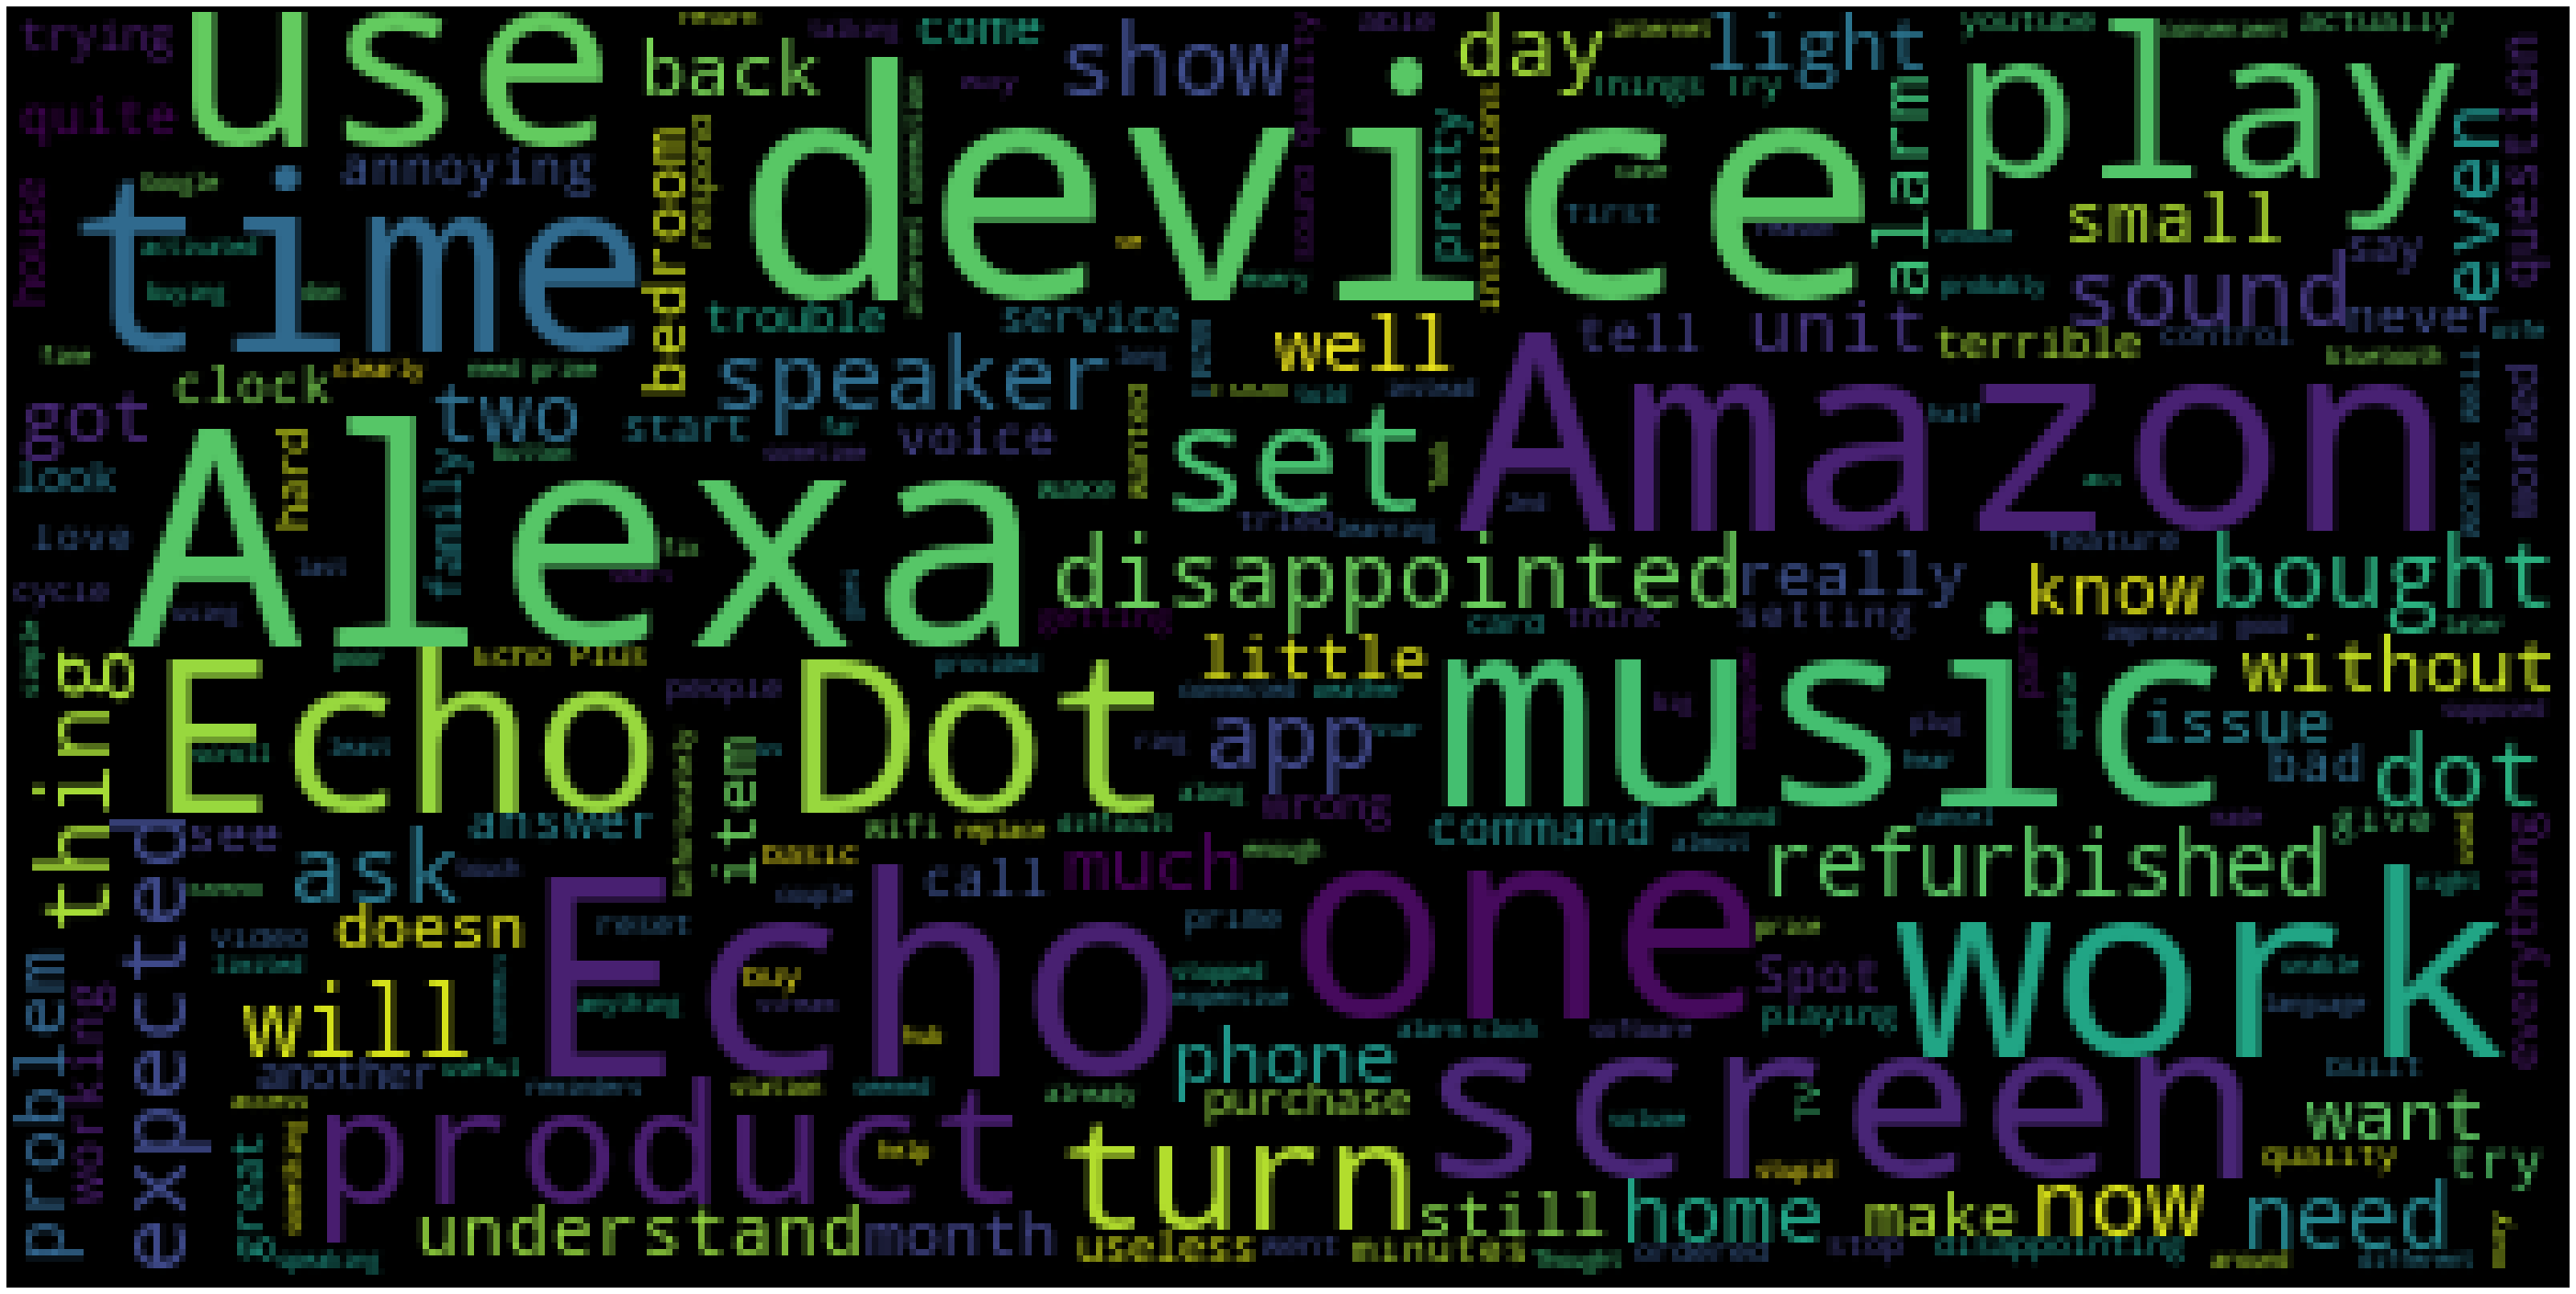

In [68]:
wc(comm['verified_reviews'][comm.polarity<-0.25],'black','Common Words' )

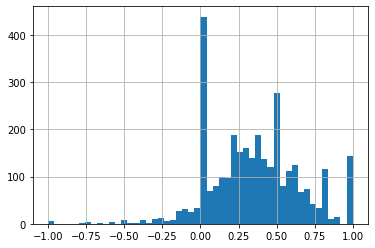

In [48]:
comm.polarity.hist(bins=50) # distribution of polarity

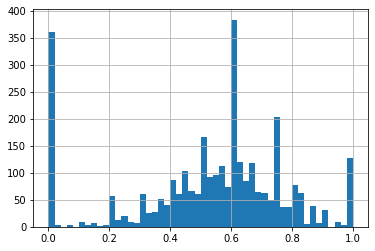

In [49]:
comm.subjectivity.hist(bins=50) # distribution of subjectivity

In [50]:
#Converting the polarity values from continuous to categorical
comm['polarity'][comm.polarity==0]= 0
comm['polarity'][comm.polarity > 0]= 1
comm['polarity'][comm.polarity < 0]= -1


 1.0    2565
 0.0     396
-1.0     189
Name: polarity, dtype: int64

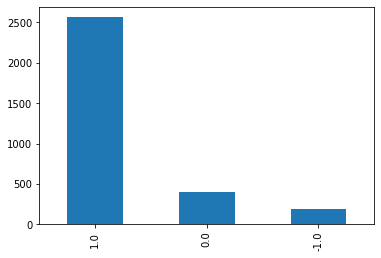

In [52]:

comm.polarity.value_counts().plot.bar()
comm.polarity.value_counts()


So we can see that Positive reviews are above 2500 where Negative reviews are below 200. So this means that most of the customers of Amazon Alexa are satisfied with its services.